In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [32]:
df0 = pd.read_excel('DATA(3).xlsx', sheet_name=0, dtype={"Office_ID(From)": 'category', "Office_ID(destination)":"category"})
df1 = pd.read_excel('DATA(3).xlsx', sheet_name=1)
df2 = pd.read_excel('DATA(3).xlsx', sheet_name=2, dtype={"Office_ID": 'category'})

In [33]:
df0

,order_id,Office_ID(From),customer_id,Office_ID(destination),order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,195,9ef432eb6251297304e76186b10a928d,149,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,149,b0830fb4747a6c6d20dea0b8c802d7ef,813,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,360,41ce2a54c0b03bf3443c3d931a367089,265,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,804,f88197465ea7920adcdbec7375364d82,296,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,68,8ab97904e6daea8866dbdbc4fb7aad2c,195,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-16 18:17:00,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,323,39bd1228ee8140590ac3aca26f2dfe00,209,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-17 15:08:00,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,296,1fca14ff2861355f6e5f14306ff977a7,722,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-28 17:37:00,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,990,1aa71eb042121263aafbe80c1b562c9c,920,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-09-21 11:24:00,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,780,b331b74b18dc79bcdf6532d51e1637c1,685,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-25 23:32:00,2018-02-15


In [34]:
df0['Office_ID(From)'].nunique()

706

In [35]:
df1=df1.drop('price',axis=1)

In [36]:
df1

,order_id,freight_value,Type_of delivery,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,13.29,пакет,28,9,14
1,00018f77f2f0320c557190d7a144bdd3,19.93,коробка,50,30,40
2,000229ec398224ef6ca0657da4fc703e,17.87,коробка,33,13,33
3,00024acbcdf0a6daa1e931b038114c75,12.79,пакет,16,10,15
4,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,коробка,35,40,30
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,43.41,тележка,89,15,40
112646,fffcd46ef2263f404302a634eb57f7eb,36.53,тележка,45,26,38
112647,fffce4705a9662cd70adb13d4a31832d,16.95,коробка,21,24,19
112648,fffe18544ffabc95dfada21779c9644f,8.72,пакет,20,20,20


In [37]:
df2

,Office_ID,geolocation_lat,geolocation_lng
0,37,-23.545621,-46.639292
1,46,-23.546081,-46.644820
2,41,-23.544392,-46.639499
3,35,-23.541578,-46.641607
4,12,-23.547762,-46.635361
...,...,...,...
993,699,-15.793056,-47.848963
994,697,-15.794197,-47.848101
995,392,-16.709130,-49.367639
996,491,-16.667661,-49.418894


In [65]:
df = df0.merge(df1, on='order_id')

In [66]:
df = df.merge(df2, left_on='Office_ID(From)', right_on='Office_ID').drop('Office_ID',axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   Office_ID(From)                112650 non-null  int64         
 2   customer_id                    112650 non-null  object        
 3   Office_ID(destination)         112650 non-null  category      
 4   order_purchase_timestamp       112650 non-null  datetime64[ns]
 5   order_approved_at              112635 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   freight_value                  112650 non-null  float64       
 9   Type_of delivery               112650 non-null  object        
 10  product_length_cm              112650 non-null  int64         
 11  

In [68]:
df = df.merge(df2, left_on='Office_ID(destination)', right_on='Office_ID', suffixes=('(from)', '(destination)')).drop('Office_ID',axis=1)

In [69]:
df

,order_id,Office_ID(From),customer_id,Office_ID(destination),order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,freight_value,Type_of delivery,product_length_cm,product_height_cm,product_width_cm,geolocation_lat(from),geolocation_lng(from),geolocation_lat(destination),geolocation_lng(destination)
0,e481f51cbdc54678b7cc49136f2d6af7,195,9ef432eb6251297304e76186b10a928d,149,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-10 21:25:00,2017-10-18,8.72,пакет,19,8,13,-23.568618,-46.582722,-23.574809,-46.587471
1,b1daed3ca434922570bdde4d05004753,195,db073abf8c93f928f9cefd125bac461f,149,2017-08-21 15:35:00,2017-08-22 04:16:00,2017-09-04 20:09:00,2017-09-13,16.79,коробка,18,4,12,-23.568618,-46.582722,-23.574809,-46.587471
2,173cd9df6006351e8e5151ea0f400bd3,360,1ca3ceea5509315ab830a64aaf0f3a62,149,2018-01-02 17:33:00,2018-01-02 17:49:00,2018-01-09 16:45:00,2018-01-18,11.60,пакет,61,34,36,-23.435346,-46.578030,-23.574809,-46.587471
3,173cd9df6006351e8e5151ea0f400bd3,360,1ca3ceea5509315ab830a64aaf0f3a62,149,2018-01-02 17:33:00,2018-01-02 17:49:00,2018-01-09 16:45:00,2018-01-18,17.31,коробка,61,34,36,-23.435346,-46.578030,-23.574809,-46.587471
4,6616fa4c89b8bf2a7e17271cdc542fca,804,19245d7a8dfb1639e01f96c455fb05b1,149,2018-08-17 20:47:00,2018-08-18 03:09:00,2018-08-28 16:09:00,2018-09-25,6.66,пакет,16,20,11,-23.483810,-46.695282,-23.574809,-46.587471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ed8319a94e3499f610df892d44e45767,942,a9acf77b6991d6bf1eea76ec090c2a4e,489,2017-06-07 22:34:00,2017-06-07 22:45:00,2017-07-11 18:55:00,2017-07-04,17.49,коробка,23,7,15,-23.476111,-46.722929,-23.576650,-46.687400
112646,808b48ab7f6fab2f801fc89c447c7eab,323,740d966972fc4d7b3911eb5bf066f510,496,2017-11-24 22:05:00,2017-11-28 03:33:00,2017-12-13 22:14:00,2018-01-03,16.99,коробка,16,16,11,-23.563601,-46.640969,-21.872877,-45.789760
112647,f1a82d00303b9e9a5863f0eb32ed07ac,480,90d791d06a3613f5232770d70dca4c63,496,2017-06-14 09:52:00,2017-06-14 10:10:00,2017-06-26 15:44:00,2017-07-10,15.20,коробка,16,2,11,-23.576447,-46.504904,-21.872877,-45.789760
112648,4505e46acb9311ffa4d1ee953432fd61,265,d45f20057bafb3da1c0b404a76da42c9,769,2017-06-16 00:23:00,2017-06-16 00:45:00,2017-07-04 15:21:00,2017-07-14,15.14,коробка,20,17,18,-23.476519,-46.595550,-16.653987,-49.185072


In [70]:
df['target'] = (df.order_delivered_customer_date - df.order_approved_at).dt.total_seconds()/(3600*24)

In [71]:
df = df.dropna()

In [72]:
df['distance'] = np.sqrt((df['geolocation_lat(from)']-df['geolocation_lat(destination)'])**2 + (df['geolocation_lng(from)']-df['geolocation_lng(destination)'])**2)

<ipython-input-72-f495f446f064>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['purchase_minute'] = df['order_purchase_timestamp'].dt.minute
df['purchase_week'] = df['order_purchase_timestamp'].dt.week
df['purchase_day_name'] = df['order_purchase_timestamp'].dt.day_name()
df['purchase_month_name'] = df['order_purchase_timestamp'].dt.month_name()
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_day_of_year'] = df['order_purchase_timestamp'].dt.dayofyear
df['time_purchase'] = (df['order_purchase_timestamp'] - pd.Timestamp("20120101")).dt.total_seconds()/3600

df['order_approved_at_hour'] = df['order_approved_at'].dt.hour
df['order_approved_at_minute'] = df['order_approved_at'].dt.minute
df['order_approved_at_week'] = df['order_approved_at'].dt.week
df['order_approved_at_day_name'] = df['order_approved_at'].dt.day_name()
df['order_approved_at_month_name'] = df['order_approved_at'].dt.month_name()
df['order_approved_at_year'] = df['order_approved_at'].dt.year
df['order_approved_at_day_of_year'] = df['order_approved_at'].dt.dayofyear
df['time_appr'] = (df['order_approved_at'] - pd.Timestamp("20120101")).dt.total_seconds()/3600

<ipython-input-73-47d0acf4e3b5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-47d0acf4e3b5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-47d0acf4e3b5>:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

<ipython-input-73-47d0acf4e3b5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [87]:
X = df.drop(columns=['target','order_id','customer_id','order_purchase_timestamp','order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, df.target, test_size=0.2, random_state=42)

model = ExplainableBoostingRegressor(random_state=42, interactions=2, learning_rate=0.2).fit(X_train, y_train)

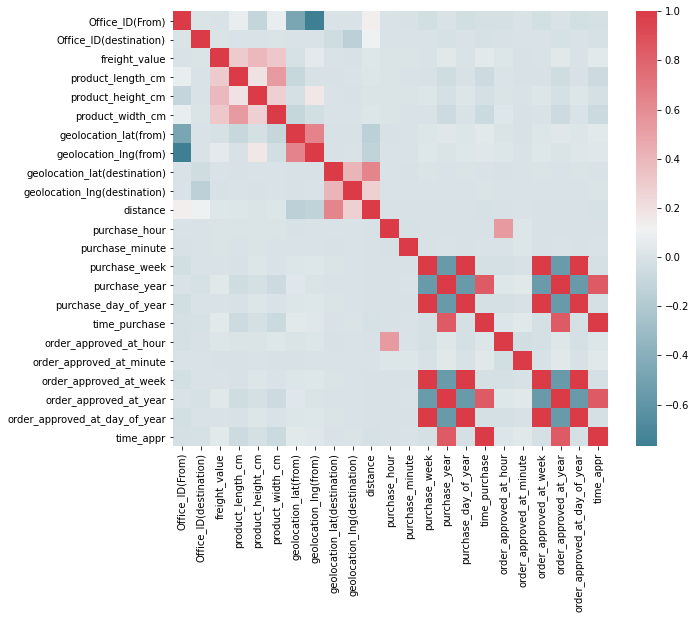

In [105]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('plot.png')

In [88]:
predictions = model.predict(X_test)
ebm_global = model.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2305245038288/ -->

In [89]:
mean_squared_error(y_test, predictions)

60.90415383175097

In [90]:
aa = pd.DataFrame()
aa['true'] = y_test
aa['pred'] = predictions
aa['comp'] = aa.true-aa.pred

In [91]:
sum_errs = sum((y_test - predictions)**2)
stdev = np.sqrt(1/(len(y_test)-2) * sum_errs)

In [95]:
# calculate prediction interval
interval = 1.96 * stdev
lower, upper = predictions - interval, predictions + interval

In [96]:
aa['lower'] = lower
aa['upper'] = upper

In [97]:
aa

,true,pred,comp,lower,upper
29424,50.055556,19.862728,30.192828,5.814690,33.910766
71826,11.046528,15.076636,-4.030108,1.028598,29.124673
35239,2.295139,4.322530,-2.027391,-9.725508,18.370568
12598,14.782639,14.714673,0.067965,0.666635,28.762711
57866,2.431944,2.420498,0.011446,-11.627540,16.468536
...,...,...,...,...,...
73744,11.304167,10.421575,0.882592,-3.626463,24.469613
103734,6.381944,6.267857,0.114088,-7.780181,20.315894
19142,27.506944,20.003645,7.503299,5.955607,34.051683
75079,9.977778,9.696156,0.281622,-4.351882,23.744194
